In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\ganesh\Documents\FyntraCustomerData.csv")
df

Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
..                             ...   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
..                                                 ...               ...   
495  4483 Jones Motorway Suite 872\nLake Jamiefurt,...               Tan   
496  172 Owen Divide Suite 497\nWest Richard, CA 19320     PaleVioletRed   
497  0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...          Cornsilk   
498  680 Jennifer Lodge Apt. 808\nBrendachester, TX...              Teal   
499  49791 Rachel Heights Apt. 898\nEast Drewboroug...       DarkMagenta   

     Avg_Session_Length  Time_on_App  Time_on_Website  Length_of_Membership  \
0             34.497268    12.655651        39.577668              4.082621   
1             31.926272    11.109461        37.268959              2.664034   
2             33.000915    11.330278        37.110597              4.104543   
3             34.305557    13.717514        36.721283              3.120179   
4             33.330673    12.795189        37.536653              4.446308   
..                  ...          ...              ...                   ...   
495           33.237660    13.566160        36.417985              3.746573   
496           34.702529    11.695736        37.190268              3.576526   
497           32.646777    11.499409        38.332576              4.958264   
498           33.322501    12.391423        36.840086              2.336485   
499           33.715981    12.418808        35.771016              2.735160   

     Yearly_Amount_Spent  
0             587.951054  
1             392.204933  
2             487.547505  
3             581.852344  
4             599.406092  
..                   ...  
495           573.847438  
496           529.049004  
497           551.620146  
498           456.469510  
499           497.778642  

[500 rows x 8 columns]

In [3]:
df.describe()

Avg_Session_Length  Time_on_App  Time_on_Website  Length_of_Membership  \
count          500.000000   500.000000       500.000000            500.000000   
mean            33.053194    12.052488        37.060445              3.533462   
std              0.992563     0.994216         1.010489              0.999278   
min             29.532429     8.508152        33.913847              0.269901   
25%             32.341822    11.388153        36.349257              2.930450   
50%             33.082008    11.983231        37.069367              3.533975   
75%             33.711985    12.753850        37.716432              4.126502   
max             36.139662    15.126994        40.005182              6.922689   

       Yearly_Amount_Spent  
count           500.000000  
mean            499.314038  
std              79.314782  
min             256.670582  
25%             445.038277  
50%             498.887875  
75%             549.313828  
max             765.518462

In [4]:
df.corr(numeric_only=True) 


Avg_Session_Length  Time_on_App  Time_on_Website  \
Avg_Session_Length              1.000000    -0.027826        -0.034987   
Time_on_App                    -0.027826     1.000000         0.082388   
Time_on_Website                -0.034987     0.082388         1.000000   
Length_of_Membership            0.060247     0.029143        -0.047582   
Yearly_Amount_Spent             0.355088     0.499328        -0.002641   

                      Length_of_Membership  Yearly_Amount_Spent  
Avg_Session_Length                0.060247             0.355088  
Time_on_App                       0.029143             0.499328  
Time_on_Website                  -0.047582            -0.002641  
Length_of_Membership              1.000000             0.809084  
Yearly_Amount_Spent               0.809084             1.000000

<Axes: >

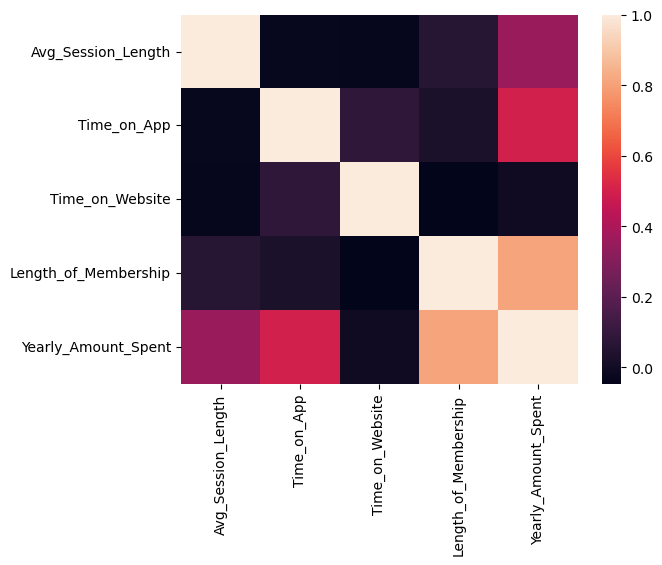

In [5]:
sns.heatmap(df.corr(numeric_only=True)) 


In [6]:
sns.heatmap(df.corr(numeric_only=True),
            cmap='coolwarm')  


<Axes: >

In [7]:
sns.heatmap(df.corr(numeric_only=True),cmap="coolwarm",annot=True)  

<Axes: >

In [8]:
sns.jointplot(data=df, x="Time_on_Website", y="Yearly_Amount_Spent", kind="scatter",color="blue")
plt.show()
 


C:\Users\ganesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [9]:
correlation = df["Time_on_Website"].corr(df["Yearly_Amount_Spent"])
print("Correlation between Time on Website and Yearly Amount Spent:", correlation)



Correlation between Time on Website and Yearly Amount Spent: -0.002640844717963287


In [10]:
sns.jointplot(data=df, x="Time_on_App", y="Yearly_Amount_Spent", kind="scatter",color="red")
plt.show()


C:\Users\ganesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [11]:
correlation = df["Time_on_App"].corr(df["Yearly_Amount_Spent"])
print("Correlation between Time on App and Yearly Amount Spent:", correlation) 




Correlation between Time on App and Yearly Amount Spent: 0.4993277700598346


C:\Users\ganesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

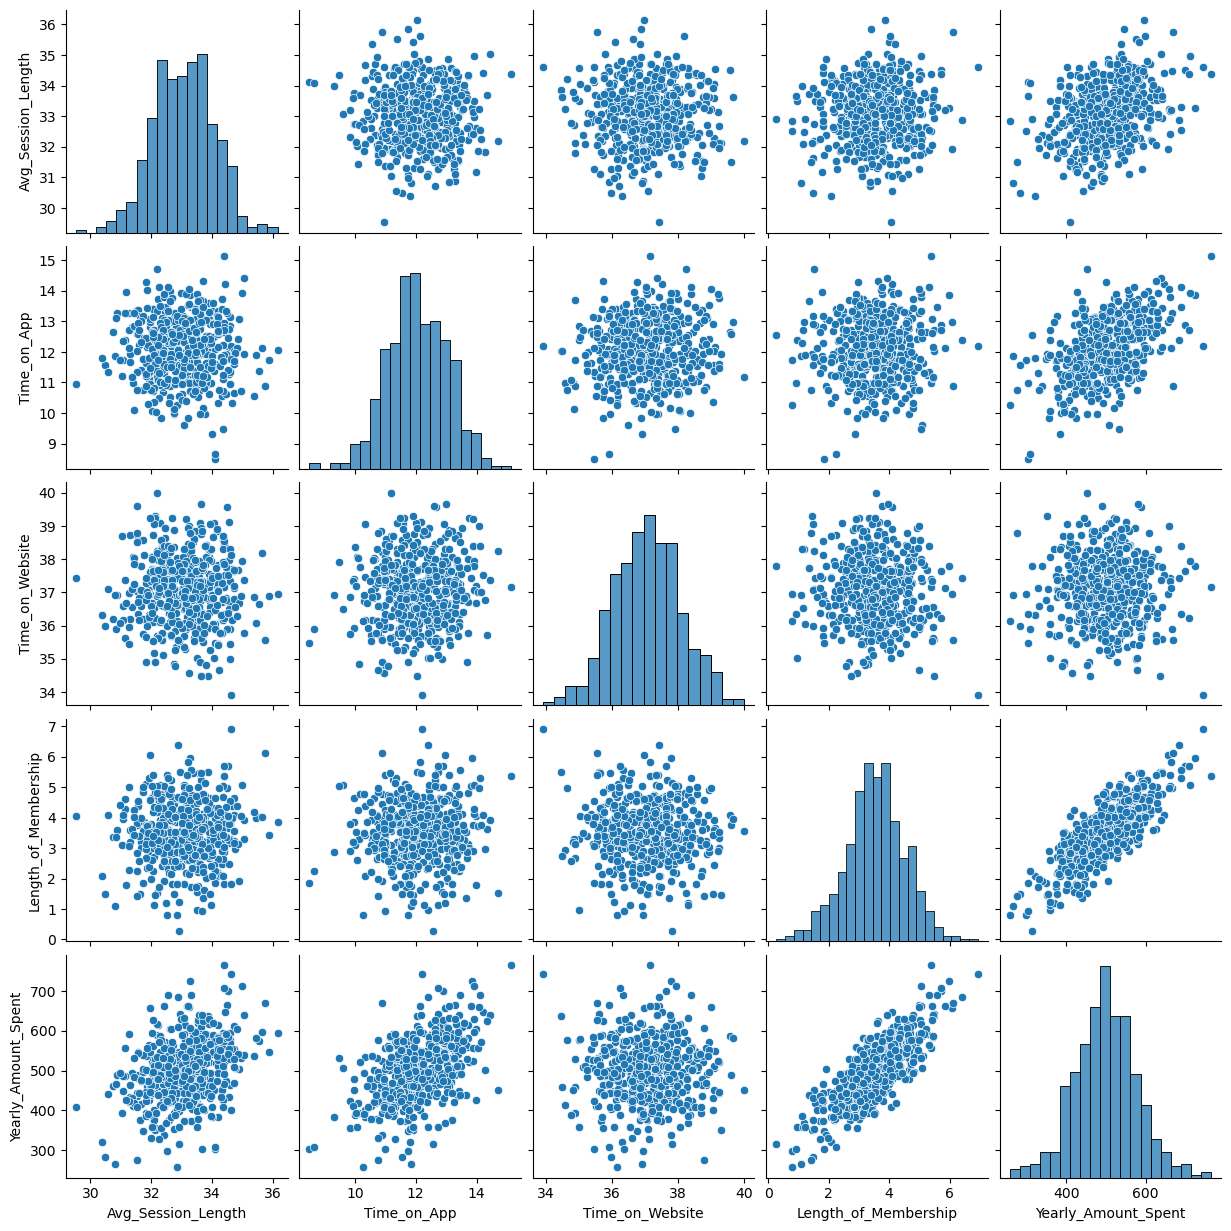

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix["Yearly_Amount_Spent"])



Avg_Session_Length      0.355088
Time_on_App             0.499328
Time_on_Website        -0.002641
Length_of_Membership    0.809084
Yearly_Amount_Spent     1.000000
Name: Yearly_Amount_Spent, dtype: float64


In [14]:
sns.lmplot(data=df, x="Length_of_Membership", y="Yearly_Amount_Spent")
plt.show()


In [15]:
df_Time_web_Amount = df.filter(
    ["Time_on_Website","Yearly_Amount_Spent"])

sns.set(style="white",color_codes=True)
sns.color_palette()
sns.jointplot(x="Time_on_Website",
              y="Yearly_Amount_Spent",data=df_Time_web_Amount)

C:\Users\ganesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


C:\Users\ganesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


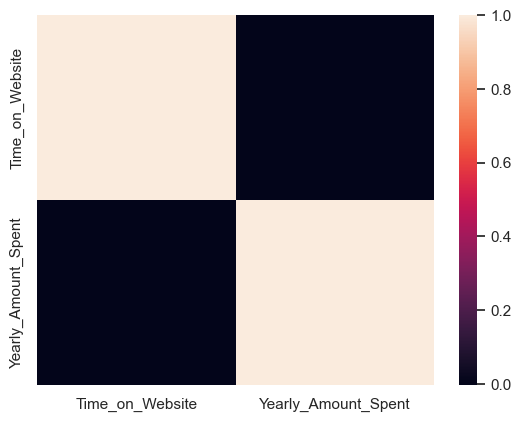

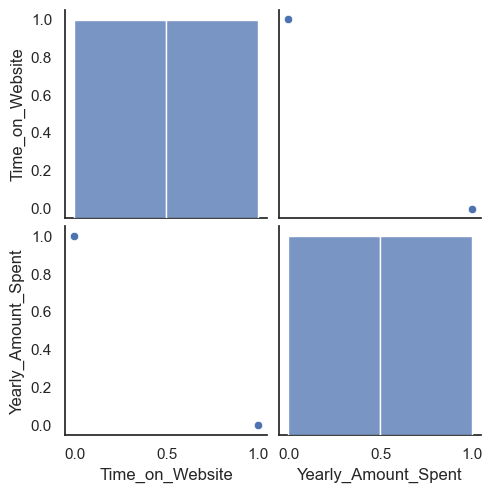

In [16]:
coff_Time_web_Amount = df_Time_web_Amount.corr()
sns.heatmap(coff_Time_web_Amount)
sns.pairplot(coff_Time_web_Amount)

In [21]:
X = df["Length_of_Membership"]
Y = df["Yearly_Amount_Spent"]
train_x, test_x, train_y, test_y = train_test_split(
    X, Y, random_state=85, test_size=0.3)

lin_model = LinearRegression()
lin_model.fit(pd.DataFrame(train_x),train_y)

LinearRegression()

In [22]:
X = df["Length_of_Membership"]
Y = df["Yearly_Amount_Spent"]

In [25]:
print(X)

0      4.082621
1      2.664034
2      4.104543
3      3.120179
4      4.446308
         ...   
495    3.746573
496    3.576526
497    4.958264
498    2.336485
499    2.735160
Name: Length_of_Membership, Length: 500, dtype: float64


In [27]:
print(Y)

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620146
498    456.469510
499    497.778642
Name: Yearly_Amount_Spent, Length: 500, dtype: float64


In [39]:
train_x, test_x, train_y, test_y = train_test_split(
    X,Y,random_state=1,test_size=0.3)  #30% data for testing & 70% for training.

In [40]:
train_x # x=features , y=targets

13     3.918542
61     5.081210
298    5.462501
39     4.222436
360    2.139403
         ...   
255    2.907095
72     3.401522
396    6.115199
235    3.634094
37     3.452389
Name: Length_of_Membership, Length: 350, dtype: float64

In [41]:
test_x # testing data of features , no of features is here

304    3.023474
340    2.964498
47     4.113226
67     3.439591
479    1.820811
         ...   
331    3.689917
197    5.039955
95     3.871003
122    4.018727
23     3.919302
Name: Length_of_Membership, Length: 150, dtype: float64

In [42]:
train_y # training data of target ,

13     573.415867
61     507.212569
298    587.574800
39     537.846195
360    444.576144
          ...    
255    524.797628
72     418.150081
396    669.987141
235    501.209173
37     490.738632
Name: Yearly_Amount_Spent, Length: 350, dtype: float64

In [43]:
test_y # testing data of target

304    494.687156
340    501.122492
47     563.672873
67     469.310861
479    402.167122
          ...    
331    533.040060
197    662.961088
95     543.340166
122    514.239521
23     519.340989
Name: Yearly_Amount_Spent, Length: 150, dtype: float64

In [44]:
lin_model = LinearRegression()

In [48]:
lin_model.fit(pd.DataFrame(train_x),train_y)

LinearRegression()

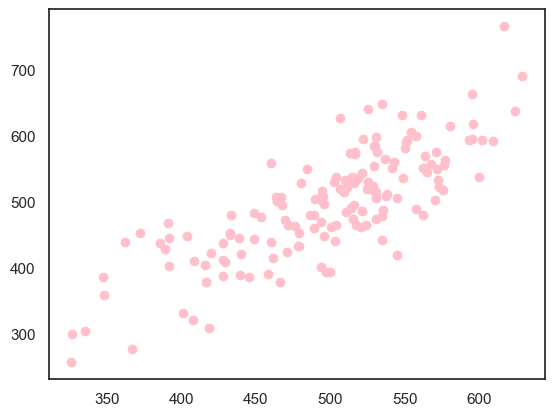

In [54]:
predicted_values = lin_model.predict(pd.DataFrame(test_x))

plt.scatter(predicted_values, test_y , color='pink')
plt.show()